In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Average rms velocities in the F4 run

In [2]:
import sys
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg
import utils

prof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4')
cb = utils.colourblind

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [3]:
def get_avg_rms_velocities(yprof, dumps):
    avg_rms_v = 0.
    avg_rms_vr = 0.
    avg_rms_vt = 0.
    
    for d in dumps:
        rms_v = np.sqrt(2.*prof.get('Ek', fname=d, resolution='l'))
        rms_vr = np.sqrt(prof.get('EkY', fname=d, resolution='l'))
        rms_vt = np.sqrt(rms_v**2 - rms_vr**2)
        
        avg_rms_v += rms_v
        avg_rms_vr += rms_vr
        avg_rms_vt += rms_vt
        
    avg_rms_v /= float(len(dumps))
    avg_rms_vr /= float(len(dumps))
    avg_rms_vt /= float(len(dumps))
    
    return avg_rms_v, avg_rms_vr, avg_rms_vt

In [4]:
r = prof.get('Y', fname=0, resolution='l')

dumps = [560, 970, 1469, 1630, 1909]
avg_rms_vr = {}
avg_rms_vt = {}

for d in dumps:
    # Always take an average except the very end of the run.
    if d < 1850:
        v, vr, vt = get_avg_rms_velocities(prof, range(d-30, d+30+1))
    else:
        v, vr, vt = get_avg_rms_velocities(prof, range(d, d+1))
    
    avg_rms_vr[d] = vr
    avg_rms_vt[d] = vt

<IPython.core.display.Javascript object>


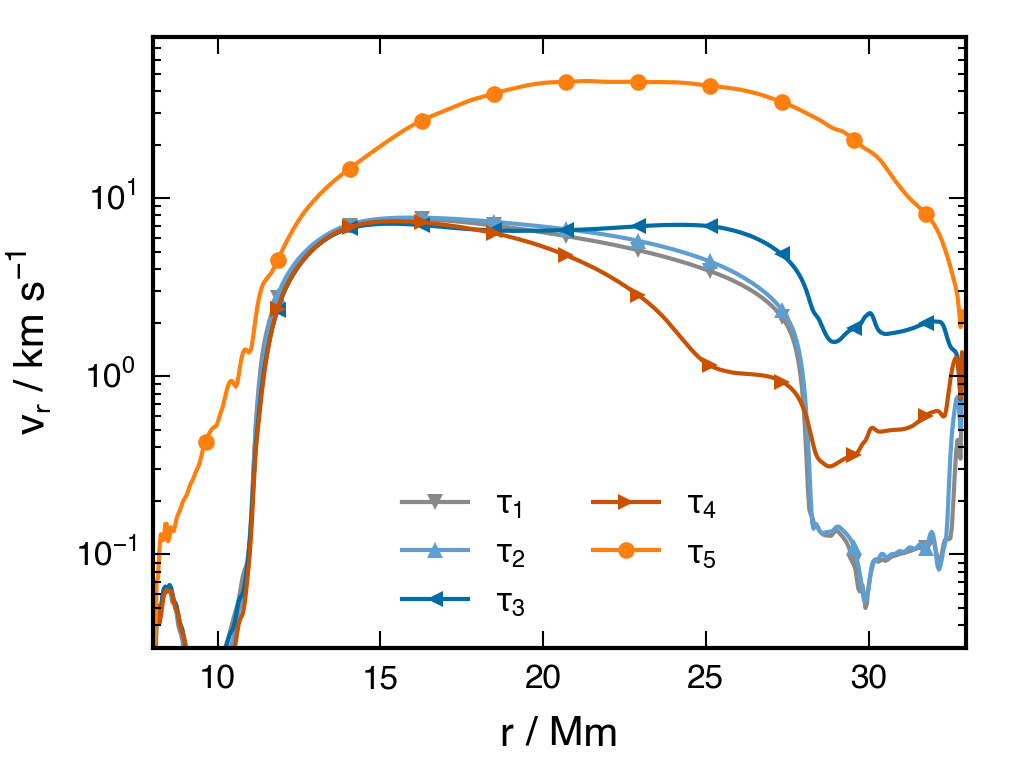

<IPython.core.display.Javascript object>


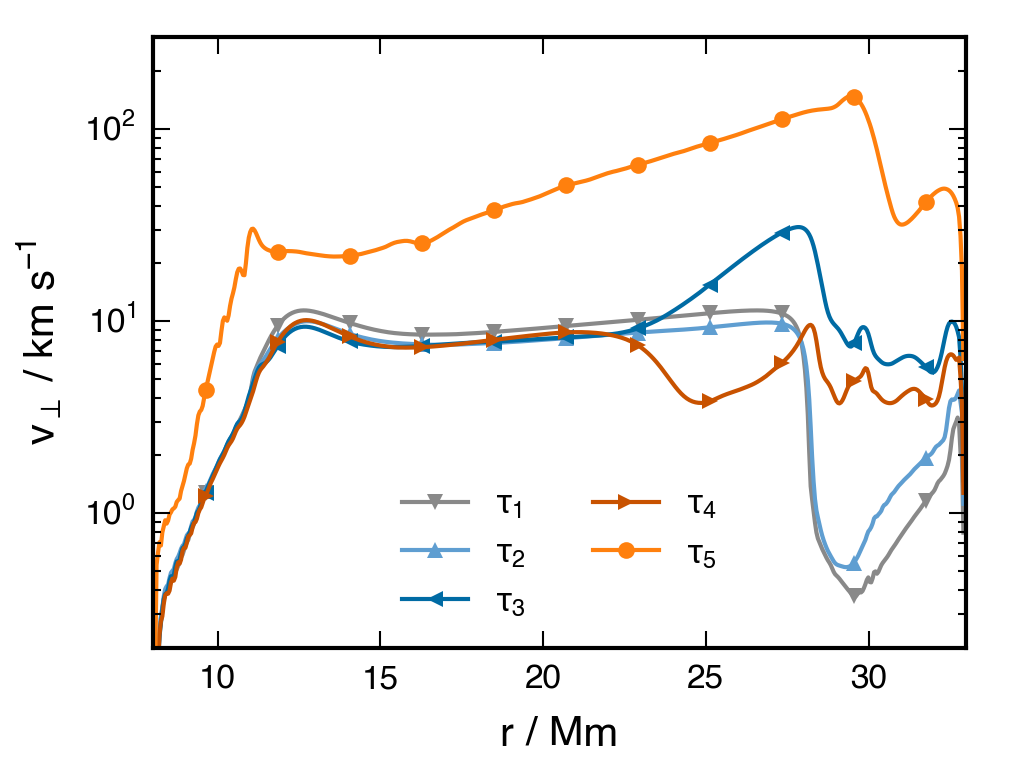

In [5]:
markers = ['v', '^', '<', '>', 'o', 's']
colours = [9, 3, 5, 8, 1, 6]

ifig = 1; plt.close(ifig); plt.figure(ifig)
for i in range(len(dumps)):
    plt.semilogy(r, 1e3*avg_rms_vr[dumps[i]], '-', color=cb(colours[i]), \
                 marker=markers[i], markevery=50, \
                 label=r'$\tau_{{{:d}}}$'.format(i+1))
plt.xlabel('r / Mm')
plt.ylabel(r'v$_\mathrm{r}$ / km s$^{-1}$')
plt.legend(loc = 0)
plt.xlim((8., 33.))
plt.ylim((3e-2, 8e1))
plt.legend(loc=0, ncol=2)
plt.savefig('avg_rms_vr_F4.pdf')

ifig = 2; plt.close(ifig); plt.figure(ifig)
for i in range(len(dumps)):
    plt.semilogy(r, 1e3*avg_rms_vt[dumps[i]], '-', color=cb(colours[i]), \
                 marker=markers[i], markevery=50, \
                 label=r'$\tau_{{{:d}}}$'.format(i+1))
plt.xlabel('r / Mm')
plt.ylabel(r'v$_\perp$ / km s$^{-1}$')
plt.legend(loc = 0)
plt.xlim((8., 33.))
plt.ylim((2e-1, 3e2))
plt.legend(loc=0, ncol=2)
plt.savefig('avg_rms_vt_F4.pdf')